# KMeans: Clusterizacion - No Supervisado

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
import os
from pathlib import Path

#Set Matplotlib defaults

plt.style.use("seaborn-whitegrid")
plt.rc("figure",autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

#Gradiente-CrossValidation

def score_dataset(X,y, model=XGBRegressor()):
    #label encoding for categoricals
    for colname in X.select_dtypes(["category","object"]):
        X[colname], _ = X[colname].factorize()
    #Validation
    score = cross_val_score(
        model,X,y,cv=5,scoring ="neg_mean_absolute_log_error"
    )
    score = -1*score.mean()
    score = np.sqrt(score)
    return score

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16372\1369702954.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [64]:
#Load data

filename="apple_quality.csv"
root= Path('.').resolve().parent
root = os.path.join(root,'data','raw',filename)

data=pd.read_csv(root)
print(data.shape)
data.head(5)

(4001, 9)


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [66]:
data.isna().value_counts()

A_id   Size   Weight  Sweetness  Crunchiness  Juiciness  Ripeness  Acidity  Quality
False  False  False   False      False        False      False     False    False      4000
True   True   True    True       True         True       True      False    True          1
Name: count, dtype: int64

In [67]:
cols=data.columns
na={}
for cols in data.columns:
    na[cols]=data[data[cols].isna()==True].index
na
data.drop(index=4000 ,inplace=True, axis=0)
for cols in data.columns:
    na[cols]=data[data[cols].isna()==True].index
na

{'A_id': Index([], dtype='int64'),
 'Size': Index([], dtype='int64'),
 'Weight': Index([], dtype='int64'),
 'Sweetness': Index([], dtype='int64'),
 'Crunchiness': Index([], dtype='int64'),
 'Juiciness': Index([], dtype='int64'),
 'Ripeness': Index([], dtype='int64'),
 'Acidity': Index([], dtype='int64'),
 'Quality': Index([], dtype='int64')}

In [68]:
cols=data.columns

X=data.copy()
X=X[['Size','Weight']]
#y=X.pop('Quality')

print(y.value_counts().unique())
print(f"Columnas X: {X.columns} Columnas y: {len(y)}")

kmean=KMeans(n_clusters=4, n_init=10, random_state=0)
X['cluster']=kmean.fit_predict(X)
X['cluster']=X['cluster'].astype('category')
X.head()

[2004 1996]
Columnas X: Index(['Size', 'Weight'], dtype='object') Columnas y: 4000


,Size,Weight,cluster
0,-3.970049,-2.512336,0
1,-1.195217,-2.839257,0
2,-0.292024,-1.351282,0
3,-0.657196,-2.271627,0
4,1.364217,-1.296612,3


c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


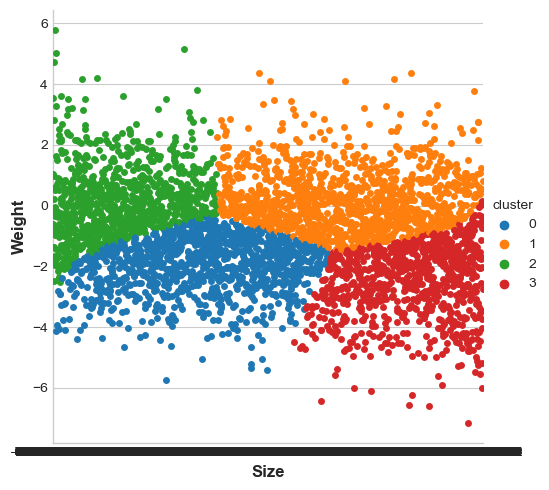

In [69]:
sns.catplot(data=X,x='Size',y='Weight',hue='cluster')

In [72]:
X=data.copy()
X=X[['Acidity','Weight']]
#y=X.pop('Quality')

print(y.value_counts().unique())
print(f"Columnas X: {X.columns} Columnas y: {len(y)}")

kmean=KMeans(n_clusters=3, n_init=10, random_state=5)
X['cluster']=kmean.fit_predict(X)
X['cluster']=X['cluster'].astype('category')
X.head()

[2004 1996]
Columnas X: Index(['Acidity', 'Weight'], dtype='object') Columnas y: 4000


,Acidity,Weight,cluster
0,-0.491590483,-2.512336,2
1,-0.722809367,-2.839257,2
2,2.621636473,-1.351282,1
3,0.790723217,-2.271627,1
4,0.501984036,-1.296612,1


<Axes: xlabel='Weight', ylabel='Acidity'>

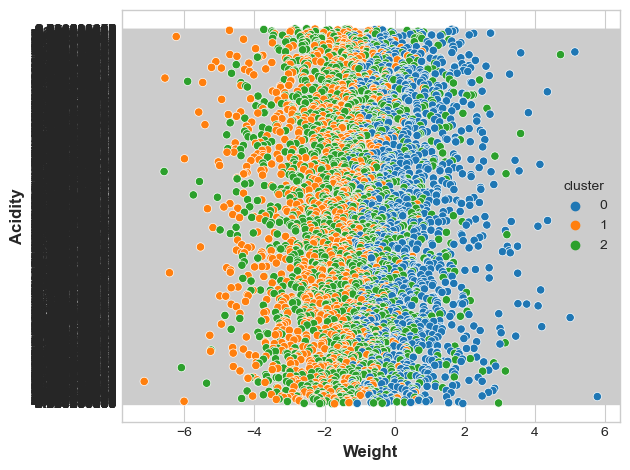

In [75]:
sns.scatterplot(data=X,x='Weight',y='Acidity',hue='cluster')
